<a href="https://colab.research.google.com/github/Youssef-Ghallab/Deep-Learning-Assignment-1/blob/main/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving orbit.csv to orbit.csv
User uploaded file "orbit.csv" with length 74303 bytes


In [3]:
df = pd.read_csv('/content/orbit.csv')
print(df.head())
print(df.isnull().sum())


   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201
time_steps    0
y             0
dtype: int64


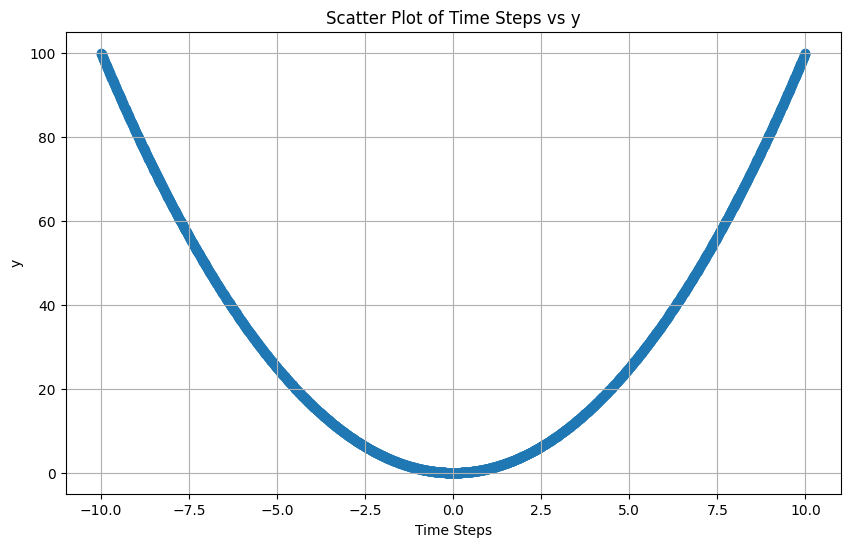

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['time_steps'], df['y'])
plt.xlabel('Time Steps')
plt.ylabel('y')
plt.title('Scatter Plot of Time Steps vs y')
plt.grid(True)
plt.show()


In [5]:

num_records = len(df)
print("Number of records:", num_records)


Number of records: 2000


In [6]:
time_steps = df['time_steps'].values
y = df['y'].values
time_steps = np.array(time_steps)
y = np.array(y)
print(time_steps)
print(y)


[-10.          -9.989995    -9.97998999 ...   9.97998999   9.989995
  10.        ]
[100.          99.80000005  99.6002003  ...  99.6002003   99.80000005
 100.        ]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_steps, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600,)
X_test shape: (400,)
y_train shape: (1600,)
y_test shape: (400,)


In [24]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error',metrics = ['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=500,validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1136.2505 - mean_absolute_error: 23.4517 - val_loss: 107.6149 - val_mean_absolute_error: 9.0860
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.3119 - mean_absolute_error: 11.0182 - val_loss: 52.4489 - val_mean_absolute_error: 5.5364
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.0527 - mean_absolute_error: 8.4386 - val_loss: 17.7060 - val_mean_absolute_error: 2.9276
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.5350 - mean_absolute_error: 7.2657 - val_loss: 11.4852 - val_mean_absolute_error: 2.6391
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.8678 - mean_absolute_error: 6.5700 - val_loss: 24.0700 - val_mean_absolute_error: 3.5961
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.5404 - mean_absolute_error: 6.5604 - val_loss: 14.3840 - val_mean_absolute_error: 2.6016
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.6591 - mean_absolute

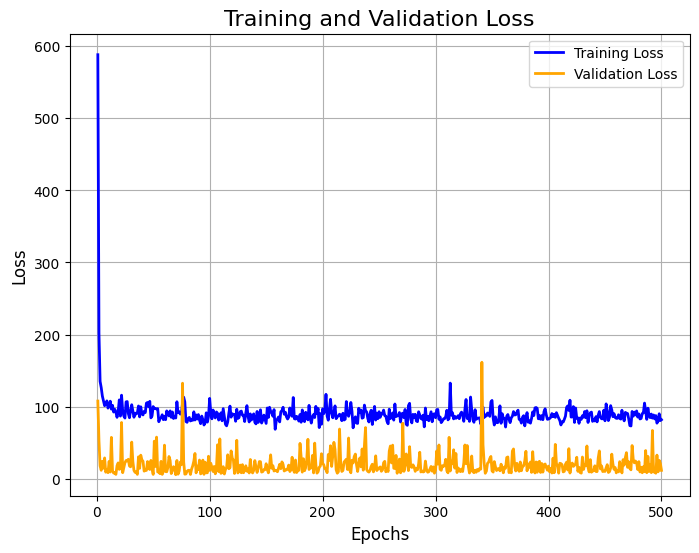

In [25]:
# Get training and validation loss from the model's history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue', linestyle='-', linewidth=2)  # Line for training loss
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='-', linewidth=2)  # Line for validation loss

# Add labels, title, and legend
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)  # Add gridlines for better readability

# Show the plot
plt.show()


In [11]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_test = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", r2)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error (MAE): 2.395856932817828
Mean Squared Error (MSE): 10.078946450105969
R-squared: 0.9878150700881438


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


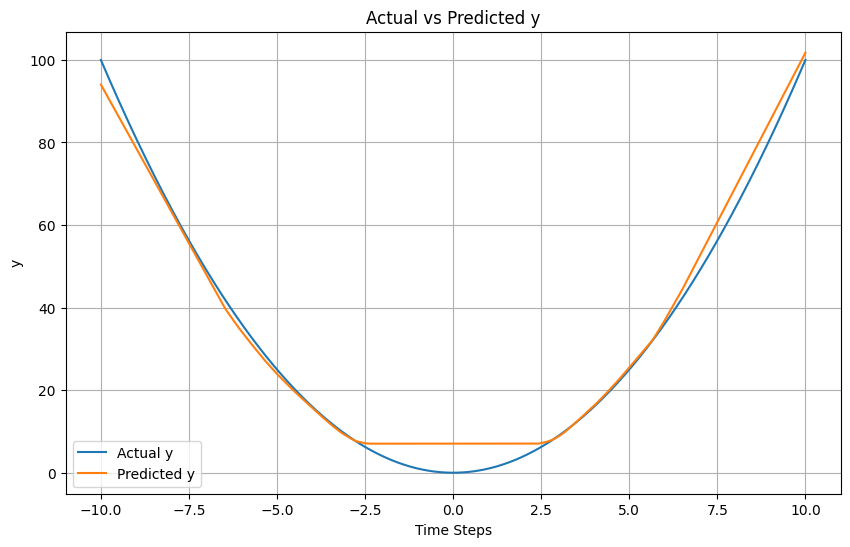

In [27]:
y_pred = model.predict(time_steps)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_steps, y, label='Actual y')
plt.plot(time_steps, y_pred, label='Predicted y')
plt.xlabel('Time Steps')
plt.ylabel('y')
plt.title('Actual vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()


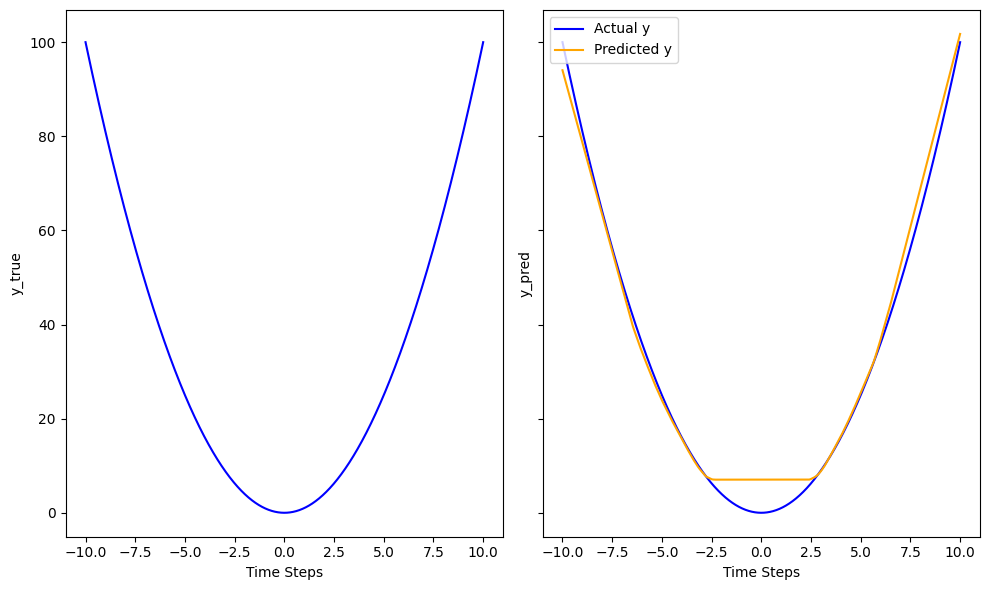

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)  # 1 row, 2 columns, shared y-axis

# Plot the actual values on the first subplot
axs[0].plot(time_steps, y, label='Actual y', color='b')
axs[0].set_xlabel('Time Steps')
axs[0].set_ylabel('y_true')
axs[0].grid(False)

# Plot the actual and predicted values on the second subplot
axs[1].plot(time_steps, y, label='Actual y', color='b')
axs[1].plot(time_steps, y_pred, label='Predicted y', color='orange')
axs[1].set_xlabel('Time Steps')
axs[1].set_ylabel('y_pred')
axs[1].grid(False)
axs[1].legend(loc='upper left')  # Add legend for predicted y

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


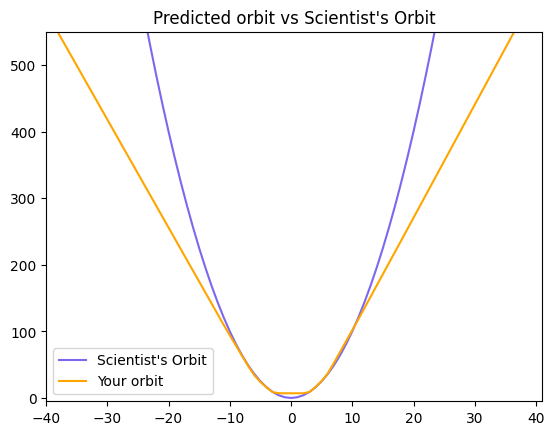

In [30]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-100, 101))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)